# Defining Sensor Coverage
The brain is a network of regions.
Different subsets of regions map onto different functionally distinct outputs, or *behaviors*.

When we measure brain regions we measure an independent (potentially overlapping, potentially identical, potentially different, etc.) set of brain regions compared to those associated with our functional input(s) of interest.

Let's formally define the *sensor coverage* metric.

In [45]:
from dbread.ro_sys import RO_SYS
import jax.numpy as np
import numpy as nnp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


B = 1
M = 1
regions = 10

basic_system = RO_SYS(B = B, M = M, regions = regions)

basic_system.H = nnp.zeros((basic_system.regions, basic_system.B))
basic_system.H[0:,:] = 1
basic_system.gamma = nnp.zeros((basic_system.regions, basic_system.M))
basic_system.gamma[0:5,:] = 1


print(f"Coverage is: {str(basic_system.coverage()[0][0])}")

Coverage is: 1.0


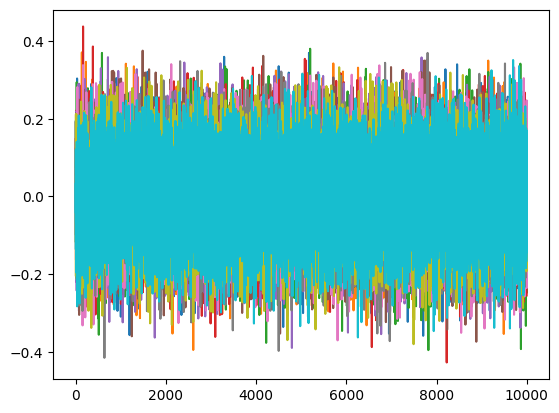

In [46]:
# we need a signal for the underlying regions
T = 10_000
X_regions = nnp.random.multivariate_normal(0*np.zeros(regions),nnp.eye(regions)/100, size=(T,))

plt.plot(X_regions)
plt.show()

Pearson Corr PearsonRResult(statistic=0.7049774661337623, pvalue=0.0)
Linear Corr [0.50086393]
Sqrt of slope [0.7077174]
R Squared: 0.4969932277563801


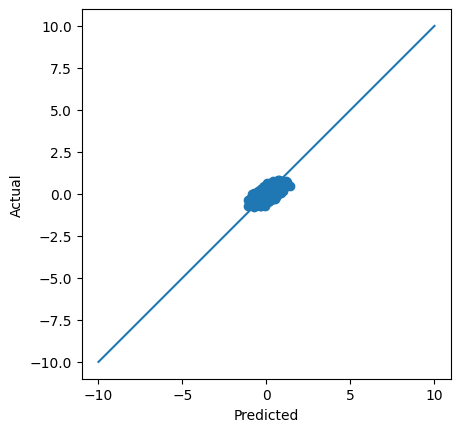

In [47]:
from scipy.stats import pearsonr
import statsmodels.api as sm

predicted = nnp.dot(basic_system.H.T, X_regions.T).squeeze()
actual = nnp.dot(basic_system.gamma.T, X_regions.T).squeeze()

fig = plt.figure()
ax = fig.add_subplot(111)

X = predicted
Y = actual

plt.scatter(X,Y)
plt.plot([-10,10],[-10,10])
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f"Pearson Corr {pearsonr(Y, X)}")
ax.set_aspect('equal')


model = sm.OLS(Y,X)
corr = model.fit()
print(f"Linear Corr {corr.params}")
print(f"Sqrt of slope {np.sqrt(corr.params)}")

lrmodel = LinearRegression()
lrmodel.fit(X.reshape(-1,1),Y.reshape(-1,1))
rsquared = lrmodel.score(X.reshape(-1,1),Y.reshape(-1,1))
print(f"R Squared: {rsquared}")


PearsonRResult(statistic=0.7049774661337623, pvalue=0.0)
Linear Corr [0.99229709]
Sqrt of slope [0.99614114]
R Squared: 0.4969932277563801, R: 0.7049774527549744


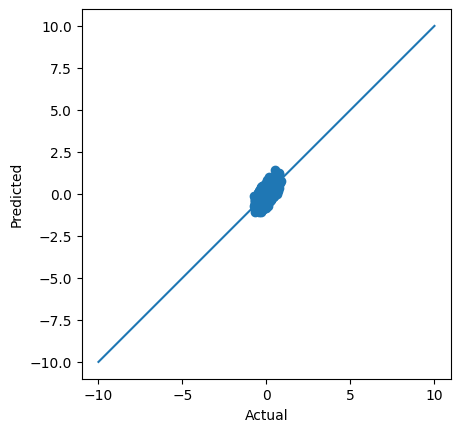

In [48]:
X = actual
Y = predicted


fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(X, Y)
plt.plot([-10,10],[-10,10])
plt.ylabel('Predicted')
plt.xlabel('Actual')

ax.set_aspect(aspect='equal')
print(pearsonr(actual, predicted))

model = sm.OLS(Y,X)
corr = model.fit()
print(f"Linear Corr {corr.params}")
print(f"Sqrt of slope {np.sqrt(corr.params)}")


lrmodel = LinearRegression()
lrmodel.fit(X.reshape(-1,1),Y.reshape(-1,1))
rsquared = lrmodel.score(X.reshape(-1,1),Y.reshape(-1,1))
print(f"R Squared: {rsquared}, R: {np.sqrt(rsquared)}")



In [49]:
# readout is a regression between measured and actual
